In [28]:
import matplotlib
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np


In [14]:
def mono_coords(x, y):
    return (x + y/2, y * np.sqrt(3)/2)

def show(lattice, w, h):
    plt.figure()
    patches = []
    colors = []
    for i in range(len(lattice)):
        x, y = from_index(i, w)
        if lattice[i] > 0:
            colors.append((0, 1, 0))
        else:
            colors.append((1, 0, 0))

        patches.append(matplotlib.patches.RegularPolygon(mono_coords(x, y), numVertices=6, radius=1/np.sqrt(3), orientation=0))

    ax = plt.gca()
    ax.add_collection(matplotlib.collections.PatchCollection(patches, facecolors=colors))
    ax.axis("off")
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    ax.set_aspect("equal")


In [51]:
def to_index(x, w):
    return x[0] + x[1] * w
def from_index(i, w):
    return i%w, i//w

def canonical_plaquette(x, w, h):
    x, y = x
    while y < 0:
        y += h
        x += h
    while y >= h:
        y -= h
        x -= h
    return (x % w, y)

def canonical_vertex(x, w, h):
    y = canonical_plaquette((x[0], x[1]), w, h)
    return (y[0], y[1], x[2])

def move(lattice, w, h):
    seed = from_index(np.random.randint(w * h), w)
    frozen = set()
    pocket = []

    def enum_vertex(vtx):
        x, y, s = vtx
        if s == 0:
            d = [(0, 0), (1, 0), (0, 1)]
        else:
            d = [(1, 1), (1, 0), (0, 1)]
        for dx, dy in d:
            yield canonical_plaquette((x+dx, y+dy), w, h)

    def check_vertex(vtx):
        total = 0
        for plaq in enum_vertex(vtx):
            total += lattice[to_index(plaq, w)]
        return abs(total) < 3

    def update_pocket(changed_pos):
        x, y = changed_pos
        for dx, dy, s in [(0, 0, 0), (-1, 0, 1), (-1, 0, 0), (-1, -1, 1), (0, -1, 0), (0, -1, 1)]:
            vtx = canonical_vertex((x+dx, y+dy, s), w, h)
            if not check_vertex(vtx):
                pocket.append(vtx)

    frozen.add(seed)
    lattice[to_index(seed, w)] *= -1
    update_pocket(seed)
    
    while len(pocket) > 0:
        vtx = pocket[-1]
        pocket.pop()
        if check_vertex(vtx):
            continue

        editable = []
        for plaq in enum_vertex(vtx):
            if plaq not in frozen:
                editable.append(plaq)

        choice = editable[np.random.choice(len(editable))]

        lattice[to_index(choice, w)] *= -1
        frozen.add(choice)
        update_pocket(choice)

In [108]:
def winding(lattice, pos, dir, w, h):
    total = 0
    prev = lattice[to_index(pos, w)]
    cpos = canonical_plaquette((pos[0] + dir[0], pos[1] + dir[1]), w, h)
    while cpos != pos:
        cur = lattice[to_index(cpos, w)]
        if cur == prev:
            total += 1

        prev = cur
        cpos = canonical_plaquette((cpos[0] + dir[0], cpos[1] + dir[1]), w, h)
    if lattice[to_index(cpos, w)] == prev:
        total += 1
    return total - w // 3

def winding_numbers(lattice, w, h):
    secs = []
    secs.append(winding(lattice, (0, 0), (1, 0), w, h))
    secs.append(winding(lattice, (0, 0), (0, 1), w, h))

    # i+j=A
    # -2i+j=B
    # i = (A-B)/3
    # j = (2A+B)/3
    print(secs)
    ri, rj = (secs[0]-secs[1])//3, (2*secs[0]+secs[1])//3
    return ri, rj

[-2, 4]
(-2, 0)


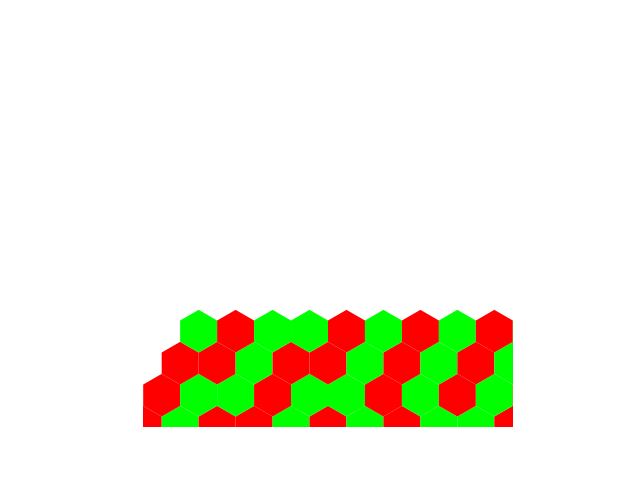

In [125]:
w = 12
h = 4
lattice = []
for i in range(h):
    for j in range(w):
        if i % 2 == 0:
            lattice.append(-1)
        else:
            lattice.append(+1)
for i in range(100):
    move(lattice, w, h)
show(lattice, w, h)
print(winding_numbers(lattice, w, h))